In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [65]:
local_df = pd.read_csv("../measurements_large/local_test/map.csv")
map_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/map.csv")
cha_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/characteristic.csv")
mag_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/manager.csv")

map_df2 = pd.read_csv("../measurements/real_bw_test_15fps/map.csv")
# jpeg_cha_df = pd.read_csv("../measurements_large/real_bw_test_15fps/characteristic.csv")
# jpeg_mag_df = pd.read_csv("../measurements_large/real_bw_test_15fps/manager.csv")

# no_map_df = pd.read_csv("../measurements_large/real_bw_no_jpeg/map.csv")
# no_cha_df = pd.read_csv("../measurements_large/real_bw_no_jpeg/characteristic.csv")
# no_mag_df = pd.read_csv("../measurements_large/real_bw_no_jpeg/manager.csv")
# time_df = pd.read_csv("../measurements_large/real_bw_test/time.csv")
# static_map_df = pd.read_csv("../measurements_large/jpeg_no_change/map.csv")
# static_cha_df = pd.read_csv("../measurements_large/jpeg_no_change/characteristic.csv")

In [66]:
# map_df["drop"] = map_df["drop"] -0.1
drop_temp = map_df2["drop"].to_numpy()
drop_temp[drop_temp>0.4] =0.4
map_df2["drop"] = drop_temp

In [67]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,feasible,sensitivity,map
0,0.15,100,1,6000000.0,0.3,1,-1,1.0,0.666667
1,0.10,90,1,6000000.0,0.3,2,-1,1.0,0.666667
2,0.00,100,1,6000000.0,0.3,3,-1,1.0,0.666667
3,0.25,100,1,6000000.0,0.3,4,-1,1.0,0.833333
4,0.10,100,1,6000000.0,0.3,5,-1,1.0,0.916667


In [68]:
quality_level = []

for q in map_df["quality"]:
    if q>50:
        quality_level.append((q-50)/10)
    else:
        quality_level.append(q)

map_df["quality_level"] = quality_level


# mAP drop

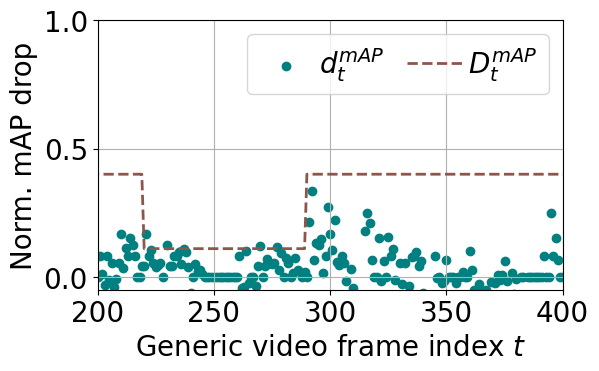

In [82]:

fig, ax1 = plt.subplots(figsize=(6, 3.5))
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Norm. mAP drop')
# ax1.tick_params(axis='y')

ax1.scatter(map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - map_df["map"].to_numpy(),label="$d^{mAP}_t$", color="teal")
# ax1.scatter(map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - map_df["map"].to_numpy(),label="Scen-2", color="tab:green")
# ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["map"].to_numpy() - no_map_df["map"].to_numpy())*0.8,label="Scen-3", color="tab:pink")



ax1.plot(map_df2["frame_id"].to_numpy(),map_df2["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label="$D^{mAP}_t$" )
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")

# ax2 = ax1.twinx() 
# color = 'dimgray'
# ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
# ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
# ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=2,loc='upper right',fontsize=20, columnspacing=0.8,handletextpad=0.2)
# ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16, columnspacing=0.8,handletextpad=-0.2)
# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/map_drop_scen4.pdf", bbox_inches='tight')

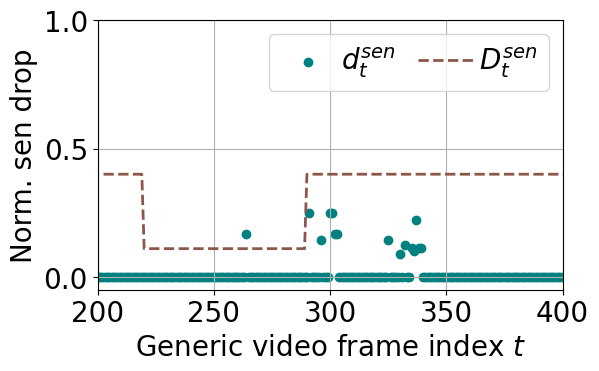

In [81]:

fig, ax1 = plt.subplots(figsize=(6, 3.5))
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Norm. sen drop')
# ax1.tick_params(axis='y', labelcolor=color)

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()),label="$d^{sen}_t$", color= "teal")
# ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()),label="Scen-2", color= "tab:green")
# ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - no_map_df["sensitivity"].to_numpy()),label="Scen-3", color= "tab:pink")

# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")
ax1.plot(map_df2["frame_id"].to_numpy(),map_df2["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label="$D^{sen}_t$" )

# ax2 = ax1.twinx() 
# color = 'dimgray'
# ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
# ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
# ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=2,loc='upper right',fontsize=20,columnspacing=0.8,handletextpad=0.2)
# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/sen_drop_scen4.pdf", bbox_inches='tight')

In [71]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

# Compression ratio

In [72]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.15,100,1,6000000.0,0.3,1,0.916303,-1,-1,-1,7.090770,780986,781730,8.513929,-1.0,-1.0,-1.0
1,0.10,90,1,6000000.0,0.3,2,0.865920,-1,-1,-1,30.966968,178829,179573,11.451223,-1.0,-1.0,-1.0
2,0.00,100,1,6000000.0,0.3,3,0.000000,-1,-1,-1,10.308987,537181,537925,23.987606,-1.0,-1.0,-1.0
3,0.25,100,1,6000000.0,0.3,4,0.976248,-1,-1,-1,27.846152,198871,199615,16.991203,-1.0,-1.0,-1.0
4,0.10,100,1,6000000.0,0.3,5,0.831363,-1,-1,-1,15.461610,358164,358908,21.094475,-1.0,-1.0,-1.0


In [73]:
mag_df.head()

,frame_id,bandwidth,drop,target_latency,technique,feasibility,target_cmp,target_snr,est_cmp,est_snr,pruning_thresh,quality,jpeg_F,decom_F,reg_F,opt_time
0,1,6000000.0,0.3,0.45,1,-1,-1.0,-1,-1.0,-1.0,0.15,100,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.339813
1,2,6000000.0,0.3,0.45,1,-1,-1.0,-1,-1.0,-1.0,0.10,90,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.071489
2,3,6000000.0,0.3,0.45,1,-1,-1.0,-1,-1.0,-1.0,0.00,100,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.103073
3,4,6000000.0,0.3,0.45,1,-1,-1.0,-1,-1.0,-1.0,0.25,100,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.079425
4,5,6000000.0,0.3,0.45,1,-1,-1.0,-1,-1.0,-1.0,0.10,100,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.063937


In [74]:
# raw_tensor_size = 128*26*26*4 # bytes
# cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
# static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

# Bandwidth

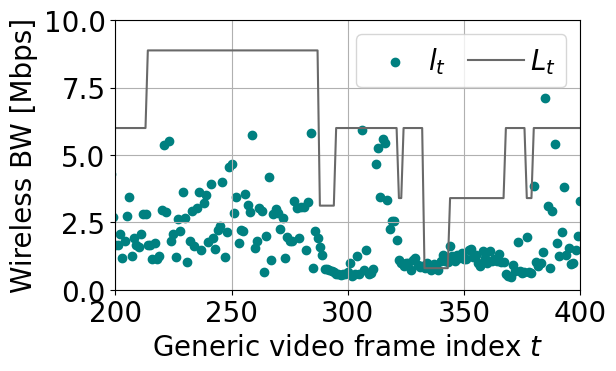

In [80]:
fig, ax1 = plt.subplots(figsize=(6, 3.5))
ax1.scatter(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6-1,color="teal",label="$l_t$")
# ax1.scatter(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6,color="tab:cyan",label="Scen-2")
# ax1.scatter(cha_df["frame_id"].to_numpy(),no_cha_df["consumed_bw"]/1e6,color="tab:olive",label="Scen-3")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6, color='dimgray', label="$L_t$")

# ax2 = ax1.twinx() 
# color = 'dimgray'
# ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
# ax2.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xlim([200,400])
ax1.set_ylim([0,10])
# ax2.set_ylim([0,10])
# ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16)
ax1.grid()
ax1.set_xlabel("Generic video frame index $t$")
ax1.set_ylabel("Wireless BW [Mbps]")
ax1.legend(ncol=2, loc="upper right",fontsize=20,columnspacing=0.8,handletextpad=0.2)


# plt.autoscale(axis="x",tight=True)
plt.savefig("../figures/bandwidth_scen4.pdf", bbox_inches='tight')